# Walk Analisys



## Intro

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# !pip install openpyxl

In [2]:
# load data
path2="C:/Users/vyoha/GitHub/tutorials/scipy/data/walk_analisys/"

In [3]:
# present data - show data from all files(foot position, orientation, velocity, ang velocity)
def plot_analisys(path2,patient_num,walk_type, rep_num):
    files=np.array(os.listdir(path2+'files/'))
    patient_str='patient'+str(patient_num)
    res = np.where(np.char.find(np.char.lower(files), patient_str) > -1)[0]

    for file in files[res]:
        # plot pos,or,vel,ang vel per mes
        
        df1=readXsens(path2,file,cols=['Right Foot x', 'Right Foot y', 'Right Foot z'],sheet='Segment Position.csv')
        print(file)
        df2=readXsens(path2,file,cols=['Right Foot x', 'Right Foot y', 'Right Foot z'],sheet='Segment Orientation - Euler.csv')
        df3=readXsens(path2,file,cols=['Right Foot x', 'Right Foot y', 'Right Foot z'],sheet='Segment Velocity.csv')
        df4=readXsens(path2,file,cols=['Right Foot x', 'Right Foot y', 'Right Foot z'],sheet='Segment Angular Velocity.csv')
#         print(df2)
#         print(df3)
#         print(df4)
        fig,ax=plt.subplots(4)
        fig.suptitle('yaw command with noise')
        ax[0].plot(df1)
#         ax[0].plot(ty,xy[-1],th,U2y[1])
#         ax[0].legend(['real yaw','calculated yaw measurement','yaw command'], fontsize="7", loc ='center')
#         ax[0].set_xlabel('time')
#         ax[0].set_ylabel('yaw[rad]')
        ax[1].plot(df2)
#         ax[1].plot(ty,xy[-1])
#         # ax[1].set_title(['hight response - velocity'])
#         ax[1].legend(['angular velocity','calculated angular velocity'], fontsize="8", loc ='center')
#         ax[1].set_xlabel('time')
#         ax[1].set_ylabel('angular velocity[rad/s]', fontsize="8")
        ax[2].plot(df3)
#         ax[2].plot(ty[-10:],xy[-1,-10:])
#         ax[2].plot(ty[-10:],U2y[1,-10:])
#         ax[2].legend(['angular velocity','calculated angular velocity','yaw command'], fontsize="7",loc ='center')
#         ax[2].set_xlabel('time')
#         ax[2].set_ylabel('angular velocity[rad/s]', fontsize="8")
        ax[3].plot(df4)

#         ax[3].set_xlabel('time')
#         ax[3].set_ylabel('tourque[Nm]', fontsize="8")
#         fig.tight_layout(pad=1.0)
    
    # look for position. orientation, velocity, ang velocity
     
#     patient10_walking_in_place_1stmeasure._Segment Position.csv
# patien21_walking_in_place_2ndmeasure._Segment Angular Velocity
# patien21_walking_in_place_2ndmeasure._Segment Orientation - Euler
# patien21_walking_in_place_2ndmeasure._Segment Position
# patien21_walking_in_place_2ndmeasure._Segment Velocity

In [4]:
def readXsens(path2,xsens_file,cols=['Right Foot x', 'Right Foot y', 'Right Foot z'],sheet='Sensor Free Acceleration'):

    
    if(not os.path.exists(path2+'files_out')):
        os.mkdir(path2+'files_out')
        
    # assemble a "file+sheet.csv" str
    file_out = path2+'files_out/'+xsens_file[0:-5] + '_' + sheet# + '.csv'
#     print(xsens_file)
#     print(file_out)

    # check if exist
    if os.path.exists(file_out):
        df = pd.read_csv(file_out, usecols=cols)
#         print(file_out)
        return df
        

    # if not create a file wit all coulomns
    else:
#         print("else")
        df = pd.read_excel(path2+'files/'+xsens_file.replace('.csv', '.xlsx'), sheet_name=None, usecols=None)

        # for sheet in df.
        for sheet in df.keys():
            file_out2 = xsens_file[0:-5] + '_' + sheet + '.csv'
            df[sheet].to_csv(path2+'files_out/'+file_out2)

        # return appropriate df
        df = pd.read_csv(file_out, usecols=cols)
    return df

In [5]:
files=os.listdir(path2+'files/')
print(len(files))
i=0
for file in files:
#     readXsens(path,'patien21_walking_in_place_2ndmeasure.xlsx',cols=['Right Foot x', 'Right Foot y', 'Right Foot z'],sheet='Segment Angular Velocity.csv')
    readXsens(path2,file,cols=['Right Foot x', 'Right Foot y', 'Right Foot z'],sheet='Segment Angular Velocity.csv')
#     print(i)
    i=i+1
# readXsens(path2,xsens_file,cols=['Right Foot x', 'Right Foot y', 'Right Foot z'],sheet='Sensor Free Acceleration'):
# patien21_walking_in_place_2ndmeasure._Segment Angular Velocity

40


patient21_walking_in_place_1stmeasure.xlsx
patient21_walking_in_space_1stmeasure.xlsx
patient21_walking_in_space_2ndmeasure.xlsx


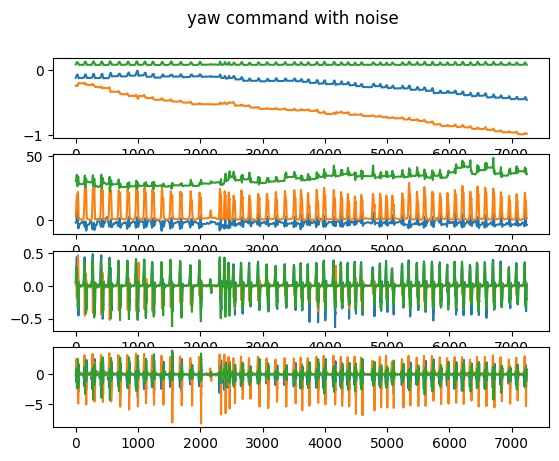

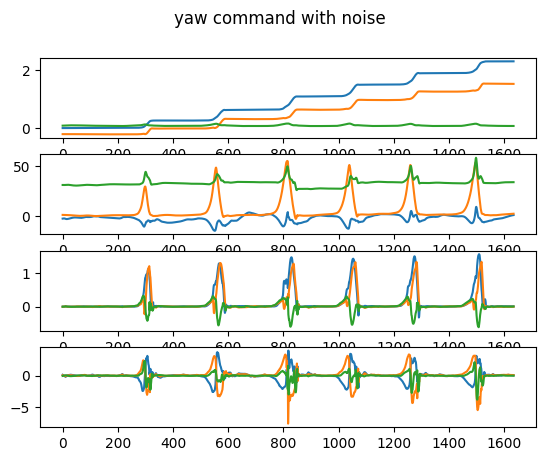

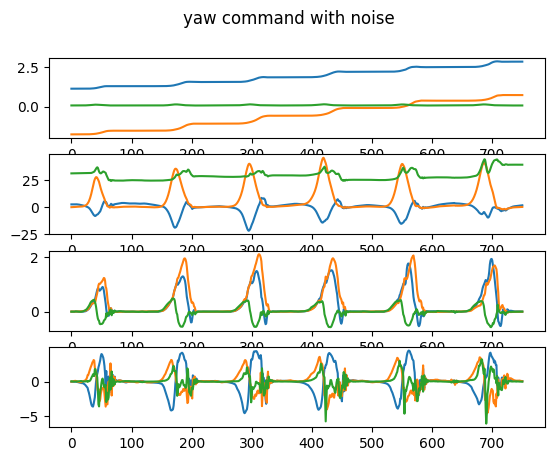

In [6]:
plot_analisys(path2,patient_num=21,walk_type=1, rep_num=1)